# CICERO SCM notebook parallel example

Import some stuff

In [1]:
import sys
import re
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt
import warnings
try:
    from pandas.core.common import SettingWithCopyWarning
except:
    from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Import the model

In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../', 'src'))
from ciceroscm import CICEROSCM

Define some input handling functions to give us example inputs

In [3]:
# NBVAL_IGNORE_OUTPUT
#from ciceroscm.input_handler import read_inputfile,read_components,read_natural_emissions
from ciceroscm.parallel.cscmparwrapper import run_ciceroscm_parallel
import ciceroscm.input_handler as input_handler

<IPython.core.display.Javascript object>

/home/masan/gitrepos/ciceroscm/venv/lib/python3.7/site-packages/scmdata/database/_database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


Define data directory

In [4]:
test_data_dir = os.path.join(os.getcwd(), '../', 'tests', 'test-data')

Define emissions data

In [5]:

gaspam_data = input_handler.read_components(
    os.path.join(test_data_dir, "gases_v1RCMIP.txt")
)
conc_data = input_handler.read_inputfile(
    os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"), True, 1750, 2100
)
ih = input_handler.InputHandler({"nyend": 2050, "nystart": 1900, "emstart": 2015})
em_data = ih.read_emissions(os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"))
nat_ch4_data = input_handler.read_natural_emissions(
    os.path.join(test_data_dir, "natemis_ch4.txt"), "CH4"
)
nat_n2o_data = input_handler.read_natural_emissions(
    os.path.join(test_data_dir, "natemis_n2o.txt"), "N2O"
)

Make a list of dictionaries to define the parameter ensemble - keys should be pamset_udm, pamset_emiconc and Index...

In [6]:
   cfgs = [
        {
            "pamset_udm": {
                "rlamdo": 15.1,
                "akapa": 0.657,
                "cpi": 0.208,
                "W": 2.2,
                "beto": 6.9,
                "lambda": 0.606,
                "mixed": 107.0,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3701,
                "qindso2": -0.4163,
                "qbc": 0.163,
                "qoc": -0.084,
                "qh2o_ch4": 0.171,
            },
            "Index": "13555_old_NR_rounded",
        },
        {
            "pamset_udm": {
                "rlamdo": 15.08357,
                "akapa": 0.6568376339229769,
                "cpi": 0.2077266,
                "W": 2.205919,
                "beto": 6.89822,
                "lambda": 0.6062529,
                "mixed": 107.2422,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3562,
                "qindso2": -0.96609,
                "qbc": 0.1566,
                "qoc": -0.0806,
            },
            "Index": "13555_old_NR_improved",
        },
        {
            "pamset_udm": {
                "rlamdo": 15.08357,
                "akapa": 0.6568376339229769,
                "cpi": 0.2077266,
                "W": 2.205919,
                "beto": 6.89822,
                "lambda": 0.6062529,
                "mixed": 107.2422,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3701323367808028 / 1.5,
                "qindso2": -0.4162980444986502 * 1.5,
                "qbc": 0.162692563111132,
                "qoc": -0.08377713183167902,
            },
            "Index": "13555_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 5.269455,
                "akapa": 0.40099950002568496,
                "cpi": 0.2054687,
                "W": 1.95183,
                "beto": 3.278654,
                "lambda": 0.7308369,
                "mixed": 115.1219,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.32211222516087934,
                "qindso2": -0.3622885009449893,
                "qbc": 0.1415852070009452,
                "qoc": -0.07290808089507649,
            },
            "Index": "10496_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 5.269455,
                "akapa": 0.40099950002568496,
                "cpi": 0.2054687,
                "W": 1.95183,
                "beto": 3.278654,
                "lambda": 0.7308369,
                "mixed": 115.1219,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.32211222516087934,
                "qindso2": -0.3622885009449893,
                "qbc": 0.1415852070009452,
                "qoc": -0.07290808089507649,
            },
            "Index": "10974_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 23.71469,
                "akapa": 0.5486541129586187,
                "cpi": 0.4059296,
                "W": 2.090927,
                "beto": 4.426507,
                "lambda": 0.6345007,
                "mixed": 97.25478,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.4031202924043847,
                "qindso2": -0.453400507735301,
                "qbc": 0.17719249872571508,
                "qoc": -0.09124374858602939,
            },
            "Index": "Unknown_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 23.13088,
                "akapa": 0.6588532950589802,
                "cpi": 0.1690946,
                "W": 2.228695,
                "beto": 2.623041,
                "lambda": 0.5402487,
                "mixed": 99.86714,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.882827534329248,
                "qindso2": -0.9929404692583796,
                "qbc": 0.3880489761967636,
                "qoc": -0.1998224726091362,
            },
            "Index": "28925_old_NR",
        },
    ]

Define scenarios as a list of dictionaries.

In [7]:
scenarios=[]
for i in range(3):
    em_data_here = em_data.mul((1 + i / 5))
    new_scen = {
        "gaspam_data": gaspam_data,
        "nyend": 2050,
        "nystart": 1900,
        "emstart": 2015,
        "concentrations_data": conc_data,
        "nat_ch4_data": nat_ch4_data,
        "nat_n2o_data": nat_n2o_data,
        "emissions_data": em_data_here,
        "udir": test_data_dir,
        "idtm":24,
        "scenname": "ssp245-plus-%d-percent" % np.multiply(i,20.),
    }
    scenarios.append(new_scen)
    
    

Parallel processor loops over all scenarios and configuration lists

In [8]:
# NBVAL_IGNORE_OUTPUT
output_variables = ["Heat Content|Ocean", "Surface Air Temperature Change"]
results = run_ciceroscm_parallel(scenarios, cfgs, output_variables)


Parallel runs:   0%|          | 0.00/6.00 [00:00<?, ?it/s]

Parameter udir is not used. Please check if you have a typo
Parameter scenname is not used. Please check if you have a typo
Parameter udir is not used. Please check if you have a typo
Parameter scenname is not used. Please check if you have a typo
Parameter udir is not used. Please check if you have a typo
Parameter udir is not used. Please check if you have a typo
Parameter scenname is not used. Please check if you have a typo
Parameter scenname is not used. Please check if you have a typo


11
1211

1131112

114
12
113
115
113
114
22
114
115141

115
22
123
22
141
142

141123

123142
11

Parameter threstemp not in pamset. Using default value 7.0



142


Parameter foan not in pamset. Using default value 0.61



12

Parameter foas not in pamset. Using default value 0.81


Parameter threstemp not in pamset. Using default value 7.0
Parameter ebbeta not in pamset. Using default value 0.0


113

Parameter fnso not in pamset. Using default value 0.7531
Parameter foan not in pamset. Using default value 0.61
Parameter threstemp not in pamset. Using default value 7.0


Parameter lm not in pamset. Using default value 40
Parameter foas not in pamset. Using default value 0.81
Parameter foan not in pamset. Using default value 0.61


114

Parameter ldtime not in pamset. Using default value 12
Parameter ebbeta not in pamset. Using default value 0.0
Parameter foas not in pamset. Using default value 0.81


Parameter fnso not in pamset. Using default value 0.7531
Parameter ebbeta not in pamset. Using default value 0.0
Parameter ref_yr not in pamset. Using default value 2010


115

Parameter lm not in pamset. Using default value 40
Parameter beta_f not in pamset. Using default value 0.287
Parameter fnso not in pamset. Using default value 0.7531


Parameter ldtime not in pamset. Using default value 12
Parameter lm not in pamset. Using default value 40


22

Parameter ref_yr not in pamset. Using default value 2010
Parameter ldtime not in pamset. Using default value 12


Parameter beta_f not in pamset. Using default value 0.287


141

Parameter qh2o_ch4 not in pamset. Using default value 0.091915


Parameter ref_yr not in pamset. Using default value 2010


123

Parameter beta_f not in pamset. Using default value 0.287



142


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287
Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using defaul

11
12
113
114
115
22
141
123
142


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287
Parameter udir is not used. Please check if you have a typo
Parameter scenname is not used. Please check if you have a typo


11

Parameter threstemp not in pamset. Using default value 7.0


Parameter foan not in pamset. Using default value 0.61


12

Parameter foas not in pamset. Using default value 0.81


Parameter ebbeta not in pamset. Using default value 0.0


113

Parameter fnso not in pamset. Using default value 0.7531


Parameter lm not in pamset. Using default value 40


114

Parameter ldtime not in pamset. Using default value 12



115

Parameter qh2o_ch4 not in pamset. Using default value 0.091915


Parameter ref_yr not in pamset. Using default value 2010


22

Parameter beta_f not in pamset. Using default value 0.287



141
123
142


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287
Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using defaul

Look at the output openSCMrunner object

In [9]:
# NBVAL_IGNORE_OUTPUT
results.head()

time                                                                                                                        1900-01-01  \
climate_model model                 region run_id                scenario              unit variable                                     
CICERO-SCM-PY ssp245-plus-0-percent World  13555_old_NR_rounded  ssp245-plus-0-percent ZJ   Heat Content|Ocean               -0.593835   
                                                                                       K    Surface Air Temperature Change   -0.005125   
                                           13555_old_NR_improved ssp245-plus-0-percent ZJ   Heat Content|Ocean               -0.593855   
                                                                                       K    Surface Air Temperature Change   -0.005126   
                                           13555_old_NR          ssp245-plus-0-percent ZJ   Heat Content|Ocean               -0.593855   

time                                                                                                                        1901-01-01  \
climate_model model                 region run_id                scenario              unit variable                                     
CICERO-SCM-PY ssp245-plus-0-percent World  13555_old_NR_rounded  ssp245-plus-0-percent ZJ   Heat Content|Ocean               -1.570286   
                                                                                       K    Surface Air Temperature Change   -0.012324   
                                           13555_old_NR_improved ssp245-plus-0-percent ZJ   Heat Content|Ocean               -1.606135   
                                                                                       K    Surface Air Temperature Change   -0.012631   
                                           13555_old_NR          ssp245-plus-0-percent ZJ   Heat Content|Ocean               -1.577005   

time                                                                                                                        1902-01-01  \
climate_model model                 region run_id                scenario              unit variable                                     
CICERO-SCM-PY ssp245-plus-0-percent World  13555_old_NR_rounded  ssp245-plus-0-percent ZJ   Heat Content|Ocean               -2.381085   
                                                                                       K    Surface Air Temperature Change   -0.014943   
                                           13555_old_NR_improved ssp245-plus-0-percent ZJ   Heat Content|Ocean               -2.505708   
                                                                                       K    Surface Air Temperature Change   -0.015937   
                                           13555_old_NR          ssp245-plus-0-percent ZJ   Heat Content|Ocean               -2.404635   

time                                                                                                                        1903-01-01  \
climate_model model                 region run_id                scenario              unit variable                                     
CICERO-SCM-PY ssp245-plus-0-percent World  13555_old_NR_rounded  ssp245-plus-0-percent ZJ   Heat Content|Ocean               -3.099948   
                                                                                       K    Surface Air Temperature Change   -0.016819   
                                           13555_old_NR_improved ssp245-plus-0-percent ZJ   Heat Content|Ocean               -3.405322   
                                                                                       K    Surface Air Temperature Change   -0.019041   
                                           13555_old_NR          ssp245-plus-0-percent ZJ   Heat Content|Ocean               -3.156586   

time                                                                                                                        1904-01-

Plot some plume plots, showing the range of temperature for each scenario (looking at percentiles of the parameter response distribution)

In [10]:

plot_kwargs = dict(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="scenario",
    style_var="model",
    style_label="IAM",
    time_axis="year",
)


and plot!

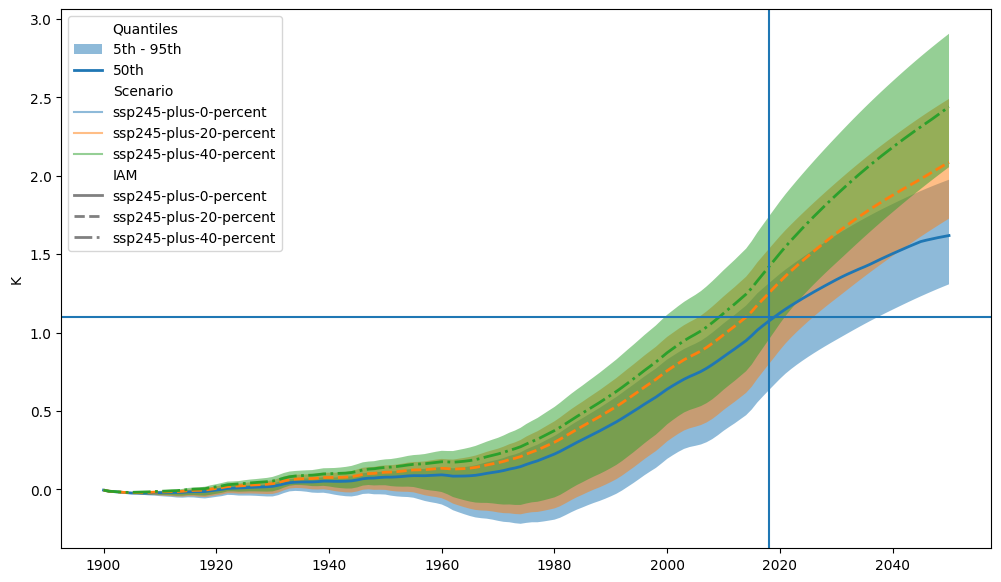

In [11]:

# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
results.filter(variable="Surface Air Temperature Change").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axhline(1.1)
ax.axvline(2018)
